In [5]:
# Basic setting
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Ensemble 모델

## [P.1] Gradient Boosting 모델

Gradient Boosting 알고리즘을 [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)를 통해 구현하고, `make_moons` 데이터셋에 대한 학습 결과 정리하기

In [11]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=1000, noise=0.50)
X_train, X_test, y_train, y_test = train_test_split(X, y)

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=1)

gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.828

In [12]:
def plot_dataset(X, y, show=True):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "o")
    
    if show:
        plt.show()

In [13]:
def plot_decision_boundary(clf, axes=None):
    if axes is None:
        x0 = np.linspace(-3, 4, 100)
        x1 = np.linspace(-3, 4, 100)
    else:
        x0 = np.linspace(axes[0][0], axes[0][1], 100)
        x1 = np.linspace(axes[1][0], axes[1][1], 100)
        
    
    x0, x1 = np.meshgrid(x0, x1)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_pred = clf.predict(X_new).reshape(x0.shape)
    
    plt.contourf(x0, x1, y_pred, alpha=0.25)
    plt.show()

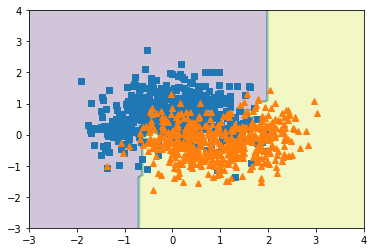

In [14]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(gb_clf)

plt.show()

## [P.2] XGBoost 모델

XGBoost는 사이킷런 기반이긴 하지만, 패키지 자체를 따로 제공하기 때문에 클래스를 불러오는 곳이 다름    
[`XGBClassifier`](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)를 이용해보고 argument를 다양하게 바꿔가며 성능 비교해보기

In [16]:
!pip install xgboost

     |████████████████████████████████| 173.5 MB 93 kB/s  eta 0:00:01


In [20]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xg_clf.fit(X_train, y_train)

y_pred = xg_clf.predict(X_test)

accuracy_score(y_test, y_pred)

[17:06:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.824

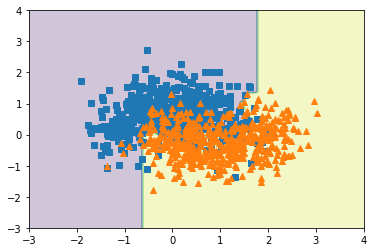

In [21]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(xg_clf)

plt.show()

Bagging tree의 장점은 각 피처들의 중요도를 계산해, 모델에 대한 설명가능성을 키워줄 수 있음    
이는 `feature_importances_` 메써드를 활용하면 쉽게 알 수 있음

## [P.3] LightGBM 모델

이번에는 또다른 Boosting 알고리즘인 [`LGBMClassifier`](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)를 활용해서 모델을 구현해보기    

In [22]:
!pip install lightgbm

     |████████████████████████████████| 2.0 MB 9.2 MB/s eta 0:00:01


In [29]:
from lightgbm import LGBMClassifier

gbm_clf = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

gbm_clf.fit(X_train, y_train)

y_pred = gbm_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.832

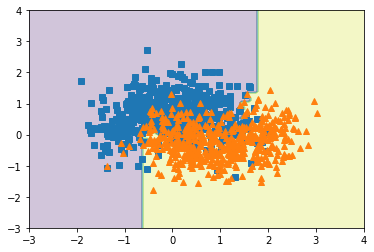

In [30]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(gbm_clf)

plt.show()